<a href="https://colab.research.google.com/github/RGArchangell/Neural-Network-Lab-1/blob/master/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
!pip install tensorflow-gpu==1.15

### Импортируем библиотеки

In [50]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

### Загружаем наши данные

In [51]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [52]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [53]:
x_train=np.dot(x_train[...,:3], [0.299, 0.587, 0.114])
x_test=np.dot(x_test[...,:3], [0.299, 0.587, 0.114])

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [54]:
s = StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=1/6)
train_index, valid_index = next(s.split(x_train, y_train))
x_valid, y_valid = x_train[valid_index], y_train[valid_index]
x_train, y_train = x_train[train_index], y_train[train_index]
print('Размеры наших данных с картинками:')
print(x_train.shape, x_valid.shape, x_test.shape)

Размеры наших данных с картинками:
(41666, 32, 32, 1) (8334, 32, 32, 1) (10000, 32, 32, 1)


### Переменные модели

In [55]:
batch_size = 128
Learning_Rate = 0.1
Epochs = 5

###Создаем модель

In [56]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='elu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Conv2D(128, (5, 5), padding='same', activation='elu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Conv2D(256, (5, 5), padding='same', activation='elu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('softmax'))

print('Архитектура нашей нейросети выглядит следующим образом:')
model.summary()

Архитектура нашей нейросети выглядит следующим образом:
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_12 (Batc (None, 32, 32, 1)         4         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 64)        1664      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 128)       204928    
________________________________________________________________

In [57]:
model.compile(
    optimizer=tf.train.AdamOptimizer(learning_rate= Learning_Rate ),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['sparse_categorical_accuracy']
)

### Обучение нейросети

In [58]:
%%time

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)
 

early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2, verbose=1)
history=model.fit_generator(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=Epochs,
    steps_per_epoch=int(np.ceil(x_train.shape[0] / batch_size)),
    validation_data=(x_valid, y_valid),callbacks=[early_stop]
)

Epoch 1/5
326/326 [==============================] - 13s 40ms/step - loss: 164.8711 - sparse_categorical_accuracy: 0.1000 - val_loss: 3.2173 - val_sparse_categorical_accuracy: 0.1001
Epoch 2/5
326/326 [==============================] - 11s 35ms/step - loss: 7.7617 - sparse_categorical_accuracy: 0.1004 - val_loss: 3.2551 - val_sparse_categorical_accuracy: 0.1000
Epoch 3/5
326/326 [==============================] - 11s 35ms/step - loss: 5.8766 - sparse_categorical_accuracy: 0.0992 - val_loss: 2.9329 - val_sparse_categorical_accuracy: 0.1001
Epoch 4/5
326/326 [==============================] - 11s 35ms/step - loss: 4.5173 - sparse_categorical_accuracy: 0.0986 - val_loss: 2.7968 - val_sparse_categorical_accuracy: 0.1000
Epoch 5/5
326/326 [==============================] - 12s 36ms/step - loss: 3.6886 - sparse_categorical_accuracy: 0.1019 - val_loss: 2.5043 - val_sparse_categorical_accuracy: 0.1001
CPU times: user 1min 13s, sys: 4.38 s, total: 1min 18s
Wall time: 59.9 s


### Смотрим на результат

<Figure size 288x216 with 0 Axes>

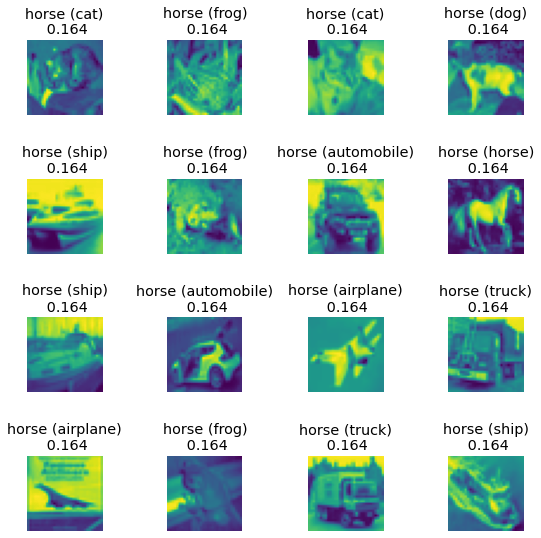

In [59]:
LABEL_NAMES=["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

from matplotlib import pyplot
%matplotlib inline

def plot_predictions(images, predictions, true_labels):
  n = images.shape[0]
  nc = int(np.ceil(n / 4))
  fig = pyplot.figure(figsize=(4,3))
  # axes = fig.add_subplot(nc, 4)
  f, axes = pyplot.subplots(nc, 4)
  f.tight_layout()
  for i in range(nc * 4):
    y = i // 4
    x = i % 4
    axes[x, y].axis('off')
    
    label = LABEL_NAMES[np.argmax(predictions[i])]
    confidence = np.max(predictions[i])
    if i > n:
      continue
    axes[x, y].imshow(images[i])
    pred_label = np.argmax(predictions[i])
    axes[x, y].set_title("{} ({})\n {:.3f}".format(
      LABEL_NAMES[pred_label], 
      LABEL_NAMES[true_labels[i][0]],
      confidence
    ))
  pyplot.gcf().set_size_inches(8, 8)  

plot_predictions(
    np.squeeze(x_test[:16]), 
    model.predict(x_test[:16]),
    y_test[:16]
)

In [63]:
score = model.evaluate(x_test, y_test, verbose=0)

print('\n', 'Точность:', int(score[1]*100), '%')


 Точность: 10 %


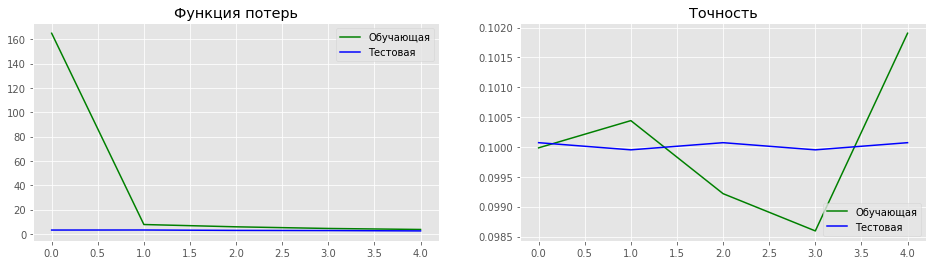

In [64]:
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = (16, 4)
plt.style.use('ggplot')

f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.set_title('Функция потерь')
ax2.set_title('Точность')

ax1.plot(history.history['loss'], color='green', label='Обучающая')
ax1.plot(history.history['val_loss'], color='blue', label='Тестовая')

ax2.plot(history.history['sparse_categorical_accuracy'], color='green', label='Обучающая')
ax2.plot(history.history['val_sparse_categorical_accuracy'], color='blue', label='Тестовая')

ax1.legend(loc='upper right')
ax2.legend(loc='lower right')
plt.show()

Попробуйте улучшить результат, меняя переменные модели